<div style="border:solid green 2px; padding: 20px">
<b>Анастасия, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка: ❌</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше: ❗️</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично: ✅</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Сборный проект - 1

Нам предоставлены данные из открытых источников на конец 2016 года для анализа компьютерных игр: наименования игр и платформ, информация о продажах в различных регионах, оценках пользователей и экспертов, возрастной рейтинг ESRB. 
Перечень столбцов с описанием содержимого приведен ниже:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (млн проданных копий)
* EU_sales — продажи в Европе (млн проданных копий)
* JP_sales — продажи в Японии (млн проданных копий)
* Other_sales — продажи в других странах (млн проданных копий)
* Critic_Score — оценка критиков (до 100)
* User_Score — оценка пользователей (до 10)
* Rating — рейтинг по возрасту от организации ESRB

Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год для интернет-магазина "Стримчик", торгующего играми по всему миру. 

План работы следующий:
1. Изучить предоставленный файл чтобы понять, подходит ли он для данной работы
2. Проверить предоставленные данные на дубликаты и пропуски
3. Подготовить информацию к работе: привести данные к подходящим типам, тексты к "змеиному" регистру
4. Провести исследовательский анализ данных
5. Составить портрет пользователей игр по регионам
6. Проверить гипотезы о равенстве средних пользовательских рейтингов
7. Написать частные выводы по каждому разделу, а также общий вывод по проекту

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. Можно также привести краткий план проведения самой работы и описание используемых столбцов. 

</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Спасибо за совет, дополнила вступление

</div>

## Изучение общей информации

###  Открываем файл с данными

Откроем файл, предварительно импортируя необходимые библиотеки

In [197]:
#Import Pandas and Matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [198]:
#Open csv file
games=pd.read_csv('/datasets/games.csv')

### Оценка содержимого файла

In [199]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В таблице немного столбцов, есть как текстовые данные (наименование игр, жанр), так и числовые (год выпуска, данные о продажах, оценки критиков и игроков в баллах). Также есть категории - платформы на которых выпущены игры и возрастной рейтинг. 

Посмотрим больше деталей с помощью функции info()

In [200]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Файл содержит 16715 строк с различными типами данных. 

Пропуски есть в наименованиях, годах выпуска, жанрах, оценках критиков и игроков, а также в возрастном рейтинге.

Обработкой данных и пропусками займемся в следующем разделе, а тут напоследок посмотрим гистограммы по числовым данным.

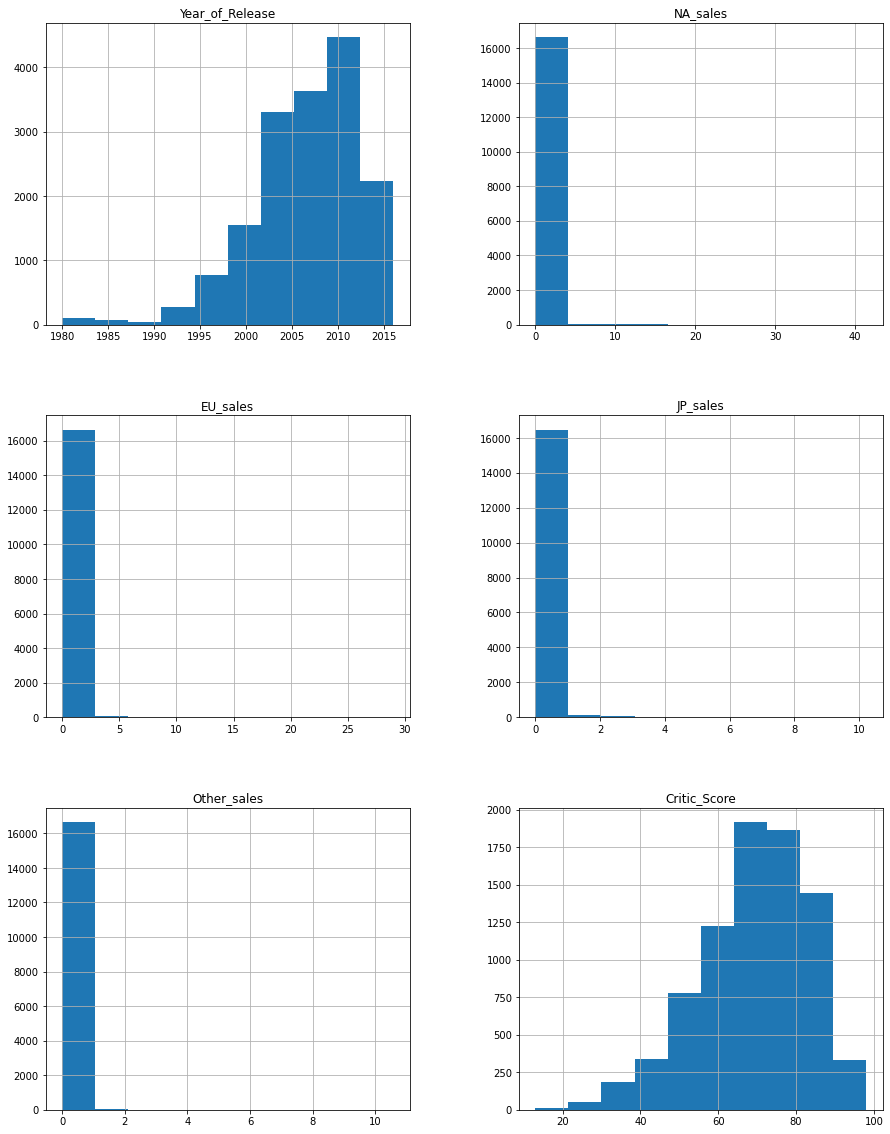

In [201]:
#Show all histograms for numeric data
games.hist(figsize=(15, 20));

Можно сделать первый вывод что в основном игры выпущены в районе 2010 года (пик гистограммы по году выпуска приходится на 2010); данные по продажам по регионам не показательны, а вот по оценке критиков можно сказать что чаще всего играм присваивают рейтинг в 70-80 баллов. 

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Классный способ посмотреть на распределение для всех столбцов сразу 👍
</div>

**Общий вывод по первому разделу**: 
- в датафрейме содержится 16715 строк с различными типами данных и 11 столбцов; 
- содержание столбцов понятно по наименованиям и по документации, предоставленной дополнительно;
- пропуски есть в наименованиях, годах выпуска, жанрах, оценках критиков и игроков, а также в возрастном рейтинге. Насколько это критично - оценим позднее; 
- в основном игры выпущены в районе 2010 года (пик гистограммы по году выпуска приходится на 2010);
- данные по продажам по регионам не показательны, 
- критики чаще всего присваивают играм рейтинг в 70-80 баллов

## Подготовка данных

### Замена наименований столбцов

Просмотрим отдельно имена столбцов чтобы выбрать те, которые необходимо поправить.

In [202]:
#All columns are listed
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Все столбцы требуют перевода в "змеиный" регистр.

In [203]:
#Rename column into 'snake' format
games=games.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release',\
                            'Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales',\
                            'Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score',\
                            'Rating':'rating'})
#All columns are listed
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Если код не помещается в одну строку, рекомендую переносить его на следующую подстроку если мы внутри одного метода пишем код или с помощью обратного слеша, если применяем несколько методов. Так код читается быстрее и понятнее.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: !</b> 

Поправила, спасибо за замечание

</div>

Все столбцы теперь написаны строчными буквами, такими наименованиями удобнее будет пользоваться.

Приведем также все данные в датафрейме к нижнему регистру.

In [204]:
#Change all data to lower register using str.lower()
games.columns = games.columns.str.lower()
#Check changes
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Отличный способ заменить регистр в наших данных 👍
</div>

Данные преобразованы в нижний регистр.

### Преобразование типов данных 

Для удобства еще раз выведем основную информацию о датафрейме.

In [205]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


-Наименование игры и платформы, а также жанр игры, представляют собой текст, поэтому тип данных 'object' тут подходит;

-*Год выпуска представлен некруглым числом 'float64', его нужно перевести в тип 'Int';*

-*Продажи по регионам с типом 'float64' подходят для анализа, но для облегчения проекта переведем эти данные во 'float32';*

-Оценка критиков с типом 'float64' также не режет глаз, 

-*а вот оценка игроков с типом 'object' требует обработки в 'float32',*

-Возрастной рейтинг с типом 'object' оставляем.

In [206]:
#Change format of year column
games['year_of_release']=games['year_of_release'].astype('Int64')

In [207]:
#Change format of columns with sales and critic score
columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']

for i in columns:
    games[i] = games[i].astype('float32')

При попытке заменить тип данных оценки пользователей, обнаруживается ошибка: в данных присутствуют не только числа. Оценим содержимое данного столбца.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
</div>

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Применила цикл for, буду так делать теперь :)

</div>

In [208]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Помимо числовых и пропущенных данных, встречается еще аббревиатура 'tbd', что в среде геймеров означает 'to be determined', или "будет определено позднее". То есть это не классический пропуск, а скорее всего система еще не успела посчитать рейтинг по этой игре по каким-то приничам. Посмотрим, много ли таких значений.

In [209]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
0.3       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Примерно 15% - это довольно много, удалять такие данные нельзя. Пока оставим этот столбец без изменений.

### Обработка пропусков

Ранее мы перечислили пропуски в данных: они есть в наименованиях, годах выпуска, жанрах, оценках критиков и игроков, а также в возрастном рейтинге. 

В наименованиях и жанрах всего по 2 пропуска, скорее всего они по одним и тем же играм и это системный пропуск. Т.к. это совсем незначительный процент от общих данных, можно избавиться от этих значений.

In [210]:
#Eliminate NAN in columns 'name' and 'genre'
games=games.dropna(subset=['name'])
games=games.dropna(subset=['genre'])

В колонке с годом выпуска игры есть 169 пропусков, что соответствует примерно 2% данных. Причина таких пропусков может быть в том, что поле "год выпуска" не было обязательным к заполнению у каких-либо производителей и в силу этого не было заполнено. 

Не будем пока ничего делать с этими данными.

Пропуски в данных в оценках критиков составляют 8578 и это более половины данных. Такая же примерно картина по отзывам пользователей - 6701 пропуск и 2424 значения 'tbd', которые по факту тоже являются пропусками - ведь они не дают информации по оценке пользователя. Наличие пропусков отражает нежелание критиков и игроков проставлять свои оценки.

В рейтинге ESRB также много пропусков, но их можно дополнительно объяснить тем, что данная организация появилась лишь в 1994 году, так что игры созданные ранее однозначно не будут иметь рейтинга ESRB. Помимо этого, данный рейтинг присваивается только играм выпущенным в США и Канаде, так что у игр произведенных в других регионах данный рейтинг будет отсутствовать.

Заполнить средними данными или медианой оценку или рейтинг мы не можем, это исказит информацию.

Заменим в оценке пользователей 'tbd' на 'NAN' и приведем колонку 'user_score' к формату 'float32'.

In [211]:
#Replace 'tbd' to 'NAN' for user scores and change format to 'float'
games['user_score']=games['user_score'].replace('tbd', np.NaN, regex=True).astype('float32')

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Мы также можем использовать сцепку методов, чтобы сократить количество кода внутри проекта.
    
Оставил пример ниже.
    
</div>

In [212]:
games['user_score'].replace('tbd', np.NaN, regex=True).astype('float32')

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16713, dtype: float32

Убедимся что все данные приведены к нужным типам.

In [213]:
#Ensure all columns' types are correct
games.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float32
eu_sales           float32
jp_sales           float32
other_sales        float32
critic_score       float32
user_score         float32
rating              object
dtype: object

Дополнительно проверим наличие явных и неявных дубликатов, чтобы повысить качество анализируемых данных.

In [214]:
#Explore clear duplicates
games.duplicated().sum()

0

In [215]:
#Explore hidden duplicates
columns = ['year_of_release', 'genre', 'critic_score', 'rating']

for d in columns:
    display(games[d].sort_values().unique())

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, <NA>]
Length: 38, dtype: Int64

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan], dtype=float32)

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

В целом можно было применить цикл `for`, чтобы автоматизировать расчеты.    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Применила цикл for, спасибо!

</div>

Явные дубликаты отсутствуют, данные по годам выпуска и оценкам критиков выглядят адекватно.

А вот рейтинг ESRB имеет скрытые дубликаты: в текущем описании есть все рейтинги из нашей колонки, кроме 'K-A'. Изучив информацию по этому рейтингу, выясняем что этот рейтинг использовался до 1998 года после чего был переименован в 'E'. Поэтому данный рейтинг в таблице можно заменить на 'E'.

In [216]:
#Replace 'K-A' to 'E' for rating
games['rating']=games['rating'].replace('K-A', 'E')
#Check that rating is changed
display(games['rating'].sort_values().unique())

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', nan], dtype=object)

Заменим пропуски в рейтингах значением "Unknown".

In [217]:
#Change NAN in rating to Unknown
games['rating'] = games['rating'].fillna('Unknown')
games['rating'].isnull().sum()

0

Данные приведены к нужным типам, проверены на пропуски и дубликаты.

### Анализ продаж по регионам

Добавим столбец с суммарной продажей по всем регионам для каждой игры.

In [218]:
#Add new column with total sales for each game
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,Unknown,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,Unknown,31.380001


Добавлен столбец с суммой продаж для дальнейшего анализа.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Кстати мы можем применить метод `sum(axis=1)` к суммируемым столбцам.
    
`df[['col1', 'col2', 'col3']].sum(axis=1)`
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Применила, чтобы попрактиковаться :)

</div>

**Общий вывод по второму разделу:** 
- текстовые данные в наименованиях столбцов и внутри таблицы были написаны с верхним и нижнем регистров. Для удобства дальнейшей работы, все тексты приведены к нижнему регистру;
- обработаны типы данных: год выпуска приведен к целому числу, оценка пользователей приведена к дробному числу;
- обработаны пропуски: удалены минимальные пропуски в наименованиях игр и жанрах; 

*есть крупные пропуски в данных по оценкам критиков и пользователей, но их нельзя удалить либо заменить - это исказит данные для анализа;
также присутствуют пропуски в рейтинге по возрасту - этих данных может не быть ввиду того что данный рейтинг появился в 1994 году, а первые игры в нашем анализе были созданы в 1980 году; кроме того, данный рейтинг отсутствует у игр произведенных не в США или Канаде;*
- обработаны дубликаты: явных дубликатов нет, а и неявных - заменен рейтинг 'K-A' на 'E', т.к. это одинаковый рейтинг "игра подходит для любого возраста", но до 1998 года он обозначался как 'K-A' (kids to adults), а позднее - как 'E' (everyone).

## Исследовательский анализ данных

### Анализ игр по годам выпуска

В первом разделе мы уже видели что пик выпуска игр пришелся примерно на 2010 год, сейчас проанализируем игры по годам выпуска более детально.

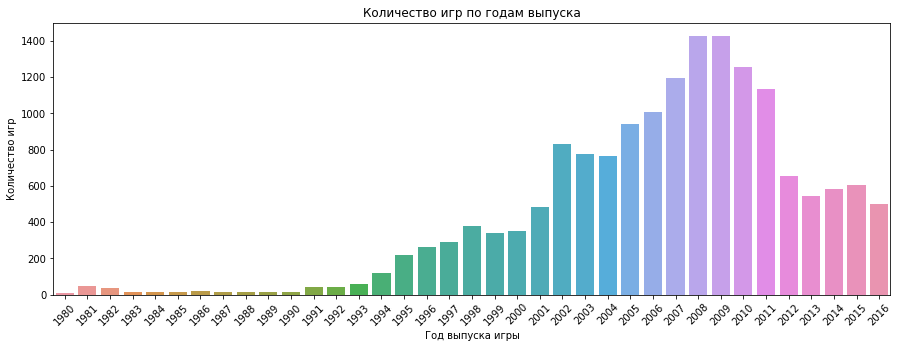

In [219]:
#Group dataframe by year and count number of games
games_by_year = games.groupby('year_of_release')['name'].agg(['count']).reset_index()
#Show bar plot with all years and number of games released
fig=plt.subplots(figsize=(15,5))
sns.barplot(data=games_by_year, x='year_of_release', y='count')
plt.xticks(rotation=45)
plt.title('Количество игр по годам выпуска')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество игр')
plt.show()

Наибольшее количество игр было выпущено в 2008 и 2009 годах, что говорит о пике популярности данного направления именно в эти годы. Это можно объяснить возросшую доступность компьютеров и ноутбуков у платежеспособного населения: раньше компьютеры были скорее преимуществом и использовались в основном корпорациями. После 2000 и стационарные компьютеры, и ноутбуки стали частью жизни большинства людей, потому и количество компьютерных игр возросло - чтобы насытить повышенный спрос геймеров.

Снижение выпуска игр после 2011 года можно объяснить массовой "смартфоновизацией" людей и переходом на социальные и мобильные игры (такие например как Angry birds). Играть на смартфоне гораздо удобнее и проще - это можно делать в перерывах на работе/учебе, в любой точке мира где есть интернет. 

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда график и его оси подписаны 😊👍
    
Так быстрее понять о чем идёт речь на самом графике.
    
</div>

### Анализ игр по платформам

Для начала посмотрим, какие в принципе платформы присутствуют в нашем датафрейме.

In [220]:
#Explore platforms
games['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Некоторые названия похожи, но меняется цифра - например, PS2, PS3, PS4 - очевидно что это разные версии одной платформы.
Также есть близнецы Wii и WiiU, похоже что это модификации одной платформы.

Найдем лидеров индустрии и оценим динамику продаж по годам.

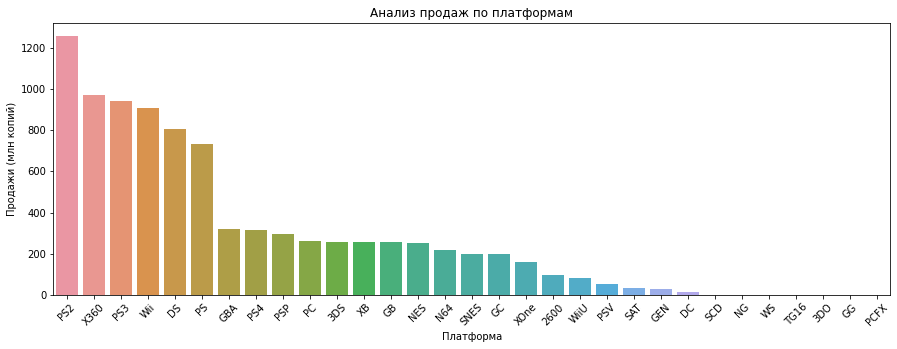

In [221]:
#Group sales by platforms
sales_platforms = games.pivot_table(index=['platform'],values='total_sales',aggfunc='sum')\
.sort_values(by='total_sales',ascending=False).reset_index()
#Use bar plot to visualize top platforms
fig=plt.subplots(figsize=(15,5))
sns.barplot(data=sales_platforms, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title('Анализ продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн копий)')
plt.show()

Откровенно лидируют первые 6 платформ, по ним проведем анализ жизненного цикла платформы.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, что уже используешь библиотеку `seaborn` 👍, с ней графики становятся более приятными 😊
</div>

In [222]:
#Create new datafarame with top-6 platforms
top_platforms = sales_platforms[:6]
top_platforms

,platform,total_sales
0,PS2,1255.770020
1,X360,971.419983
2,PS3,939.649963
3,Wii,907.510010
4,DS,806.119995
5,PS,730.859985


In [223]:
#Create list of 6 top platforms
top_6_list = top_platforms['platform'].tolist()
top_6_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

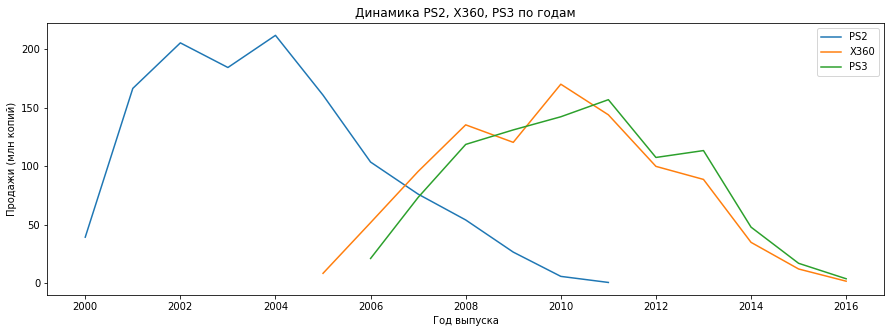

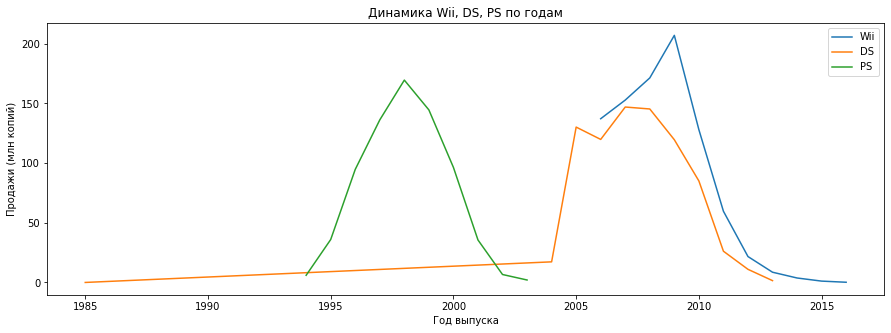

In [224]:
#Show line plots with top platforms' sales by years
fig = plt.subplots(1)
for name in top_6_list[:3]:
    games.query('platform == @name and year_of_release != 0').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize = (15, 5), label=name)
    plt.xlabel('Год выпуска')
    plt.title('Динамика PS2, X360, PS3 по годам')
    plt.ylabel('Продажи (млн копий)')
    plt.legend()
fig = plt.subplots(1)
for name in top_6_list[3:]:
    games.query('platform == @name and year_of_release != 0').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize = (15, 5), label=name)
    plt.xlabel('Год выпуска')
    plt.title('Динамика Wii, DS, PS по годам')
    plt.ylabel('Продажи (млн копий)')
    plt.legend()

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Не забывай пожалуйста подписывать каждый график.
    
Это важный момент всего проекта, так быстрее понять о чем идёт речь на графике.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Добавила

</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Обрати внимание, что график не совсем читабелен, потому что включает в себя много линий. Обычно используют 2-3 линии максимум на одном графике, чтобы повысить комфортность изучения графика.
    
Рекомендовал бы посмотреть каждую платформу на отдельном графике или использовать метод `subplots` построив графики в 2 столбца например.
    
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Попробовала!! Вроде так более читабельно ))

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

🔥    
    
</div>

Жизненный цикл топовых платформ составляет около 10 лет, это особенно наглядно видно по PS2 (c 2000 по 2012 год примерно), X360 (c 2005 по 2016 год) и PS3 (c 2006 по 2016 год).

Самый популярный период длится 2-5 лет, после пика начинается спад. 

Для нашего анализа нужно найти платформы, которые находятся на пике или идут вверх, то есть пик еще впереди. Очевидно что среди выбранных 6 лидеров пиковый период уже пройден, так что нужно анализировать другие платформы и игры и искать те, что находятся на подъеме.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Согласен.
    
В том числе мы могли посчитать срок жизни платформы – вычесть из максимальной даты минимальную по каждой платформе и затем усреднить получившиеся значения.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Мне кажется, платформа DS сильно исказит среднюю - у нее 20 лет медленного роста в начале, у других платформ нет такого... Но спасибо за идею, учту на будущее!

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Мы же можем в том числе взять медиану 😊    
</div>

### Выбор актуального периода и анализ данных в нем

Для целей данного анализа актуальным является период наиболее близкий к отчетному, то есть в данном случае 2016 год. Чтобы отследить динамику и найти именно нужные нам платформы (находящиеся на пике или стремящиеся к нему), возьмем период 2013-2016 гг, то есть 4 полных года до отчетного периода.

Для начала отберем все платформы, которые возникли после 2012 года и точно попадут в анализируемый период.

In [225]:
#Show platforms after 2012 with grouped sales
platforms_actual = games.query('year_of_release > 2012')
platforms_actual_show = platforms_actual.groupby('platform')['total_sales'].agg('sum').reset_index()
platforms_actual_show.sort_values(by='total_sales',ascending=False)

,platform,total_sales
4,PS4,314.140015
3,PS3,181.429993
10,XOne,159.320007
0,3DS,143.250000
9,X360,136.800003
8,WiiU,64.629997
2,PC,39.430000
6,PSV,32.989998
7,Wii,13.660000
5,PSP,3.500000


In [226]:
#Create list of actual platforms
actual_list = platforms_actual_show['platform'].tolist()
actual_list

['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

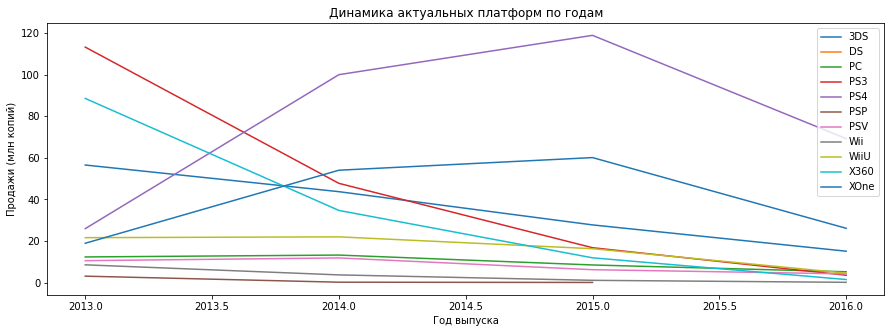

In [227]:
#Show line plots with actual platforms after 2012 sales by years
for name in actual_list:
    games.query('platform == @name and year_of_release != 0 and year_of_release > 2012').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize = (15, 5), label=name)
   
    plt.xlabel('Год выпуска')
    plt.title('Динамика актуальных платформ по годам')
    plt.ylabel('Продажи (млн копий)')
    plt.legend()

Все актуальные платформы показывают падение, особенно те что ранее были лидерами рынка - PS3 и X360. Это говорит о том, что рынок в целом стагнирует и данная отрасль становится все менее популярной.

Но есть пара платформ, которые пока на подъеме, и в них можно вкладываться, чтобы максимально продлить период притока денег - это PS4, 3DS и XOne. По ним проведем дальнейшее исследование.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши графики повторяются.
    
Это говорит о том, что мы можем создать функцию для оптимизации нашего кода. 
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Спасибо, в следующий раз напишу функцию! Графика всего два, а про функции наш куратор говорит - лучше ими не злоупотреблять, т.к. они тяжелые и долго грузятся, делают проект инертнее
    
</div>

(0.0, 2.0)

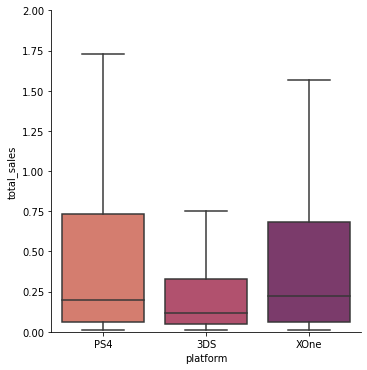

In [228]:
#Create df of most interesting platforms
most_interesting_platforms = games.query('platform == "PS4" or platform == "3DS" or platform == "XOne"')
#Show boxplot for most interesting platforms
sns.catplot(x='platform',
           y='total_sales',
           kind='box',
           data=most_interesting_platforms,
           showfliers=False,
           palette='flare',
           )
plt.ylim(0,2)

По графику "ящик с усами" можно сделать вывод, что PS4 и XOne более стабильны по своим показателям - основная масса продаж находится в пределах 750 тыс копий, но довольно много продается и сверх межквартильного размаха: верхний "ус", представляющий собой 4й квартиль, доходит до 1 млн 750 тыс копий.

У 3DS потенциал меньше - не только медиана находится ниже, но и верхний "ус" - есть выбросы, но они не показательны; а вот основной объем продаж явно ниже чем у PS4 и XOne.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Отличный способ визуализировать разброс данных по каждой платформе 👍
    
Кстати мы можем использовать параметр `showfliers=False`, чтобы убрать выбросы с графика.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Применила, красиво :)
    
</div>

### Влияние отзывов на продажи

На примере платформы XOne рассмотрим как влияют отзывы пользователей и критиков на продажи.

Для этого построим диаграмму рассеяния и оценим, есть ли корреляция между данными.

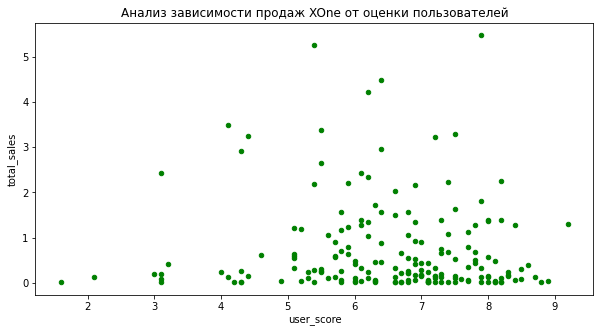

In [229]:
#Create new df for XOne analysis
xone_analysis = platforms_actual.query('platform == "XOne"')
#Scatter plot to see correlation between user score and sales of XOne
xone_analysis.plot(x='user_score', y='total_sales', kind='scatter', \
                   title='Анализ зависимости продаж XOne от оценки пользователей',figsize=(10, 5), color='green')
plt.show()

Наблюдается небольшая зависимость продаж от оценки пользователей: те игры, которые оцениваются более чем на 4, продаются лучше. Игры у которых оценки 2,3 - практически не продаются 

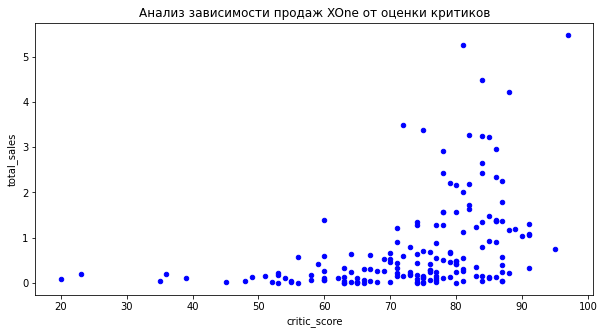

In [248]:
#Scatter plot to see correlation between critic score and sales of XOne
xone_analysis.plot(x='critic_score', y='total_sales', kind='scatter', \
                   title='Анализ зависимости продаж XOne от оценки критиков',figsize=(10, 5), color='blue')
plt.show()

Зависимость довольно очевдная - критикам продажи доверяют больше, чем игрокам :)
Самые кассовые игры - те что оценены критиками в 70 баллов и более.
Есть даже топовая игра - оценка по ней почти 100 баллов и продажи самые высокие. Посмотрим, что это за игра, интересно же

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    
Хорошие и логичные комментарии. Очень важно строить график корреляции между переменными, ведь может произойти такая ситуация, что расчет у нас очень сильный а на графике абсолютно другая картина.
    
---

В том числе можно было построить матрицу корреляции между нужными нам переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Поэкспериментирую с хитмэпом на локале, спасибо!
    
</div>

In [231]:
#See game with max sales in XOne platform
xone_analysis.query('critic_score > 95')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.0,0.47,97.0,7.9,M,5.47


Это GTA V и в ее популярности не приходится сомневаться - даже если ты вообще не играешь в компьютерные игры (как например я), все равно про GTA наслышан.  

Для того чтобы соотнести выводы с продажами игр на других платформах, посмотрим средние оценки критиков и пользователей для наиболее актуальных платформ, по которым ранее анализировали динамику.

In [232]:
#Create new df with grouped platforms and scores
score_analysis = platforms_actual.pivot_table(index='platform', values=['total_sales','critic_score','user_score'],\
                                              aggfunc={"total_sales": np.sum, "critic_score": 'mean', "user_score": 'mean'},\
                                              fill_value=0).sort_values(by='critic_score',ascending=False).reset_index()
score_analysis

,platform,critic_score,total_sales,user_score
0,PC,75.550339,39.430000,6.269678
1,PSP,74.000000,3.500000,5.850000
2,XOne,73.325447,159.320007,6.521429
3,PS4,72.091270,314.140015,6.748249
4,WiiU,71.642860,64.629997,7.017500
5,PSV,71.636360,32.989998,7.527273
6,PS3,70.198349,181.429993,6.348387
7,X360,69.234566,136.800003,5.993007
8,3DS,68.338028,143.250000,6.976250
9,DS,0.000000,1.540000,4.800000


Таблица отсортирована по отзывам критиков - платформы с самыми высокими отзывами на первых позициях. При этом очевидно, что продажи не зависят напрямую от данных отзывов - лидер продаж PS4 всего лишь четвертый в спсике, а второй за ним PS3 - седьмой.

То же самое можно сказать и про отзывы игроков: наиболее высокие отзывы (больше 7) у платформ PSV и WiiU, которые далеко не в топе продаж.

### Анализ игр по жанрам

Проанализируем игры по жанрам. Для этого посмотрим на самые популярные и самые кассовые жанры среди актуальных платформ.

In [233]:
#Show most popular games
genre_pop = platforms_actual.groupby('genre')['total_sales'].agg(['count', 'sum']).reset_index()
genre_pop.sort_values(by='sum',ascending=False)

,genre,count,sum
0,Action,766,321.869995
8,Shooter,187,232.979996
10,Sports,214,150.649994
7,Role-Playing,292,145.889999
3,Misc,155,62.820000
4,Platform,74,42.630001
6,Racing,85,39.889999
2,Fighting,80,35.310001
1,Adventure,245,23.639999
9,Simulation,62,21.760000


Самый популярный жанр - экшн, на втором месте стрелялки.

А вот самые непопулярные - паззлы, которые гораздо приятнее собирать руками на полу.

In [234]:
#Create dataframe grouped by genres 
genre_analysis = platforms_actual.pivot_table(index='genre', values=['total_sales','name'],\
                                              aggfunc={"total_sales": np.sum, "name": 'count'},\
                                              fill_value=0).rename(columns={'name':'quantity'}).reset_index()
#Add column with average sales per game
genre_analysis['average_sales'] = genre_analysis['total_sales'] / genre_analysis['quantity']
genre_analysis.sort_values(by='average_sales',ascending=False)

,genre,quantity,total_sales,average_sales
8,Shooter,187,232.979996,1.245882
10,Sports,214,150.649994,0.703972
4,Platform,74,42.630001,0.576081
7,Role-Playing,292,145.889999,0.499623
6,Racing,85,39.889999,0.469294
2,Fighting,80,35.310001,0.441375
0,Action,766,321.869995,0.420196
3,Misc,155,62.820000,0.405290
9,Simulation,62,21.760000,0.350968
5,Puzzle,17,3.170000,0.186471


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    
Кстати, чтобы самим в ручную не рассчитывать нам средний показатель, можно было в аргументе `aggfunc` также передать `'mean'`.
    
---
    
Здорово, что оцениваешь также средние продажи, т.к. они более устойчивы к выбросам, чем просто количество или сумма.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Спасибо, учту на будущее
    
</div>

Самые высокие продажи за 1 игру у стрелялок - причем с хорошим отрывом. Можно сделать вывод, что этот жанр бьет точно в цель: зарабатывает много денег своим создателям.

Неплохие показатели у спортивных игр (тут тоже вспоминается FIFA - то есть они на слуху даже у непосвященных).

Обратная ситуация у игр-приключений. При большом количестве созданных игр, продано их весьма посредственное количество, поэтому рейтинг продаж за 1 игру самый низкий. Скорее всего, такие игры интересны небольшому числу усидчивых интеллектуалов, т.к. проходить их нужно долго и не каждый на это способен.

Жанр экшн - лидер по объему продаж, но в пересчете на 1 игру он в серединке. Думаю, у производителей тут своя стратегия и они стараются разнообразить игры для своей аудитории, за что фанаты награждают их постоянным спросом.

**Общий вывод по третьему разделу:** 

- Наибольшее количество игр выпускалось в 2002-2011 годах, пики производства пришлись на 2008 и 2009 гг. После 2011 года выпуск компьютерных игр постоянно снижается, что можно объяснить переходом на мобильные и социальные игры.
- Среди платформ есть очевидные лидеры продаж - PS2, X360, PS3, Wii, DS, PS, по ним проведен анализ жизненного цикла и сделан вывод, что в среднем платформа "живет" 10 лет, пик продаж длится 2-5 лет.
- Исходя из этой информации, подходящий период для анализа взят - последние 4 года (2013-2016). За этот период проанализирована динамика продаж 11 актуальных платформ, почти у всех уже идет спад, но выделены три платформы которые еще "на плаву" - это PS4, 3DS и XOne. Для них проведен статистический анализ с помощью "ящиков с усами", выявивший что PS4 и XOne более стабильны по своим показателям, а у 3DS потенциал меньше - не только медиана продаж находится ниже, но и четвертый квартиль: основной объем продаж явно ниже чем у PS4 и XOne.
- На примере платформы XOne проведен анализ влияния отзывов критиков и пользователей на продажи. Вывод: отзывы пользователей практически не влияют на продажи, тогда как отзывы критиков - влияют довольно сильно.
- Для остальных актульных платформ также проведен анализ влияния отзывов. Прямого влияния нет.
- Проведен анализ игр по жанрам: самые популярные игры в стиле экшн, самые непопулярные - паззлы. Но вот по "кассовости" лучше всех стрелялки - у них наибольшие продажи на одну игру. А наименее удачные в этом плане - игры-приключения.

## Портрет пользователя по региону

Для определения портрета пользователя каждого из трех регионов, выделим самые популярные платформы и жанры для Северной Америки, Европы и Японии. Представим их в виде круговых диаграмм, а также оценим влияние рейтинга ESRB на продажи в каждом регионе. 

### Анализ популярных платформ по регионам

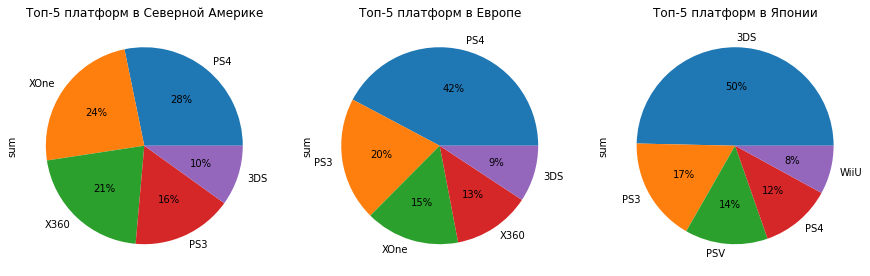

In [235]:
#Pie plots to show the share of most popular platforms by region
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,5))
platforms_actual.groupby('platform')['na_sales'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False)\
                .head(5).set_index('platform').plot(ax=ax1, kind='pie', y='sum', autopct='%1.0f%%', figsize=(15, 6), \
                      legend=False, title = 'Топ-5 платформ в Северной Америке')
platforms_actual.groupby('platform')['eu_sales'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False)\
                .head(5).set_index('platform').plot(ax=ax2, kind='pie', y='sum', autopct='%1.0f%%', figsize=(15, 6), \
                      legend=False, title = 'Топ-5 платформ в Европе')
platforms_actual.groupby('platform')['jp_sales'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False)\
                .head(5).set_index('platform').plot(ax=ax3, kind='pie', y='sum', autopct='%1.0f%%', figsize=(15, 6), \
                      legend=False, title = 'Топ-5 платформ в Японии')
plt.show()

Итак, по наиболее популярным платформам:

- в Северной Америке лидер - PS4, на втором месте XOne, далее X360, PS3 и 3DS;
- в Европе лидером является тоже PS4, далее PS3, XOne, X360 и 3DS;
- в Японии лидирует платформа 3DS, второе место за PS3, далее идут PSV, PS4 и WiiU.

Можно заключить, что в Евпропе и Северной Америке схожи предпочтения - все платформы в топ-5 одинаковые, но популярны немного в разном порядке; а в Японии вкусы отличаются - повторяется лишь PS3 и PS4, остальные платформы, включая лидера - другие.

### Анализ популярных жанров по регионам

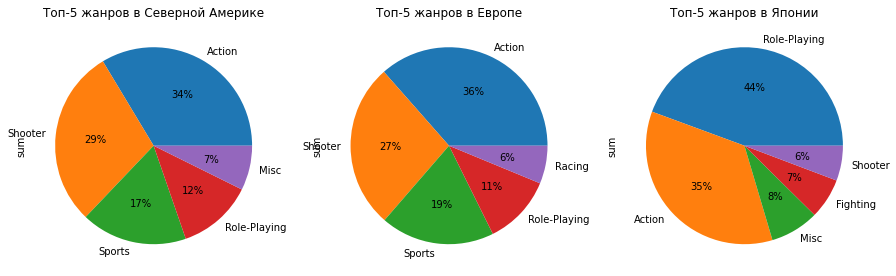

In [236]:
#Pie plots to show the share of most popular genres by region
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,5))
platforms_actual.groupby('genre')['na_sales'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False).\
                            head(5).set_index('genre').plot(ax=ax1, kind='pie', y='sum', \
                            legend=False, autopct='%1.0f%%', figsize=(15, 6), title = 'Топ-5 жанров в Северной Америке')
platforms_actual.groupby('genre')['eu_sales'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False).\
                            head(5).set_index('genre').plot(ax=ax2, kind='pie', y='sum', autopct='%1.0f%%', figsize=(15, 6),\
                            legend=False, title = 'Топ-5 жанров в Европе')
platforms_actual.groupby('genre')['jp_sales'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False).\
                            head(5).set_index('genre').plot(ax=ax3, kind='pie', y='sum', autopct='%1.0f%%', figsize=(15, 6), \
                            legend=False, title = 'Топ-5 жанров в Японии')
plt.show()

В части жанров, наблюдаем следующее:

- в Северной Америке лидируют игры в жарне экшн, в спину им дышат стрелялки. Также в топ-5 попали спортивные и ролевые игры, замыкают пятерку лидеров игры в стиле аркада;
- в Европе первая четверка такая же, но на пятом месте гонки;
- в Японии лидер совсем другой - это ролевые игры, причем доля их огромна - 44% среди лидеров! Второе место за экшн-играми, также занимающим большую нишу - 35% среди лидеров. На третьем, четвертом и пятом месте - аркада, борьба и стрелялки, соответственно.

Европа с Северной Америкой снова похожи, что в целом объяснимо - это люди западного типа, со схожим менталитетом. В то время как в Японии у людей другие приоритеты - зачастую их не выгонишь с работы, и многие японцы из-за этого одиноки либо трудно сходятся с людьми. Не удивительно что они предпочиают реальным отношениям ролевые игры в виртуале.

### Влияние рейтинга ESRB на продажи в регионах

Для оценки влияния возрастного рейтинга на продажи, построим диаграммы с показателями рейтинга и данными по объемам продаж по каждому региону. Но для начала вспомним что означает каждый рейтинг:

*«EC» («Early childhood») — Игра для детей младшего возраста*

*«E» («Everyone») — Игра подходит для всех возрастов*

*«E10+» («Everyone 10 and older») — Игра для лиц старше 10 лет*

*«T» («Teen») — «Подросткам» - Игра подходит для лиц от 13 лет*

*«M» («Mature») — Игра для лиц старше 17 лет*

*«AO» («Adults Only 18+») — Только для взрослых старше 18 лет*

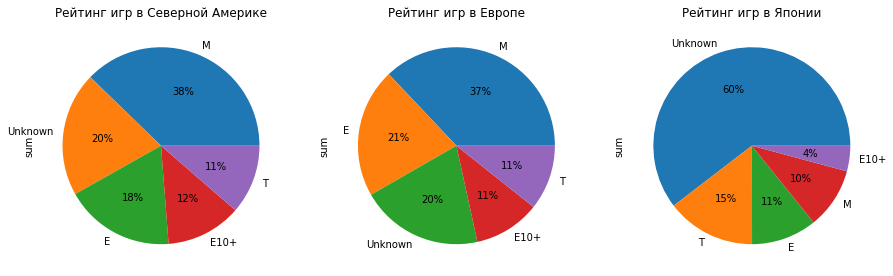

In [237]:
#Pie plots to show the share of most popular genres by region
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,5))
platforms_actual.groupby('rating')['na_sales'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False).\
                      set_index('rating').plot(ax=ax1, kind='pie', y='sum', autopct='%1.0f%%', figsize=(15, 6), \
                      legend=False, title = 'Рейтинг игр в Северной Америке')
platforms_actual.groupby('rating')['eu_sales'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False).\
                      set_index('rating').plot(ax=ax2, kind='pie', y='sum', autopct='%1.0f%%', figsize=(15, 6), \
                      legend=False, title = 'Рейтинг игр в Европе')
platforms_actual.groupby('rating')['jp_sales'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False).\
                      set_index('rating').plot(ax=ax3, kind='pie', y='sum', autopct='%1.0f%%', figsize=(15, 6), \
                      legend=False, title = 'Рейтинг игр в Японии')
plt.show()

В Северной Америке и Европе рейтинги схожи: наибольшую часть всех игр представляют игры для лиц старше 17 лет (рейтинг М); на втором месте в обоих регионах рейтинг Е - то есть игры, подходящие для всех возрастов; далее Е10+ и Т - игры для подростков. Большая доля неизвестных рейтингов - это можно объяснить тем, что рейтинг ESRB для игры выпускаемых в США и Канаде, но ведь играют не только в игры выпущенные в этих странах.

В Японии опять все по-другому: 60% рейтинга не определено, то также объясняется фактом локальности рейтинга ESRB. Но даже среди отмеченных рейтингов лидируют игры для подростков, на втором месте игры для всех возрастов, на третьем - игры для лиц старше 17 лет и на четвертом - игры для лиц старше 10 лет.

**Общий вывод по четвертому разделу:** 

Анализ пользователей по трем доступным регионам показал, что

- Вкусы в отношении платформ для Северной Америки и Европы схожи, обоим регионам нравятся PS4, XOne, X360, PS3 и 3DS; а вот в Японии пользователи предпочитают 3DS, PS3, PSV, PS4 и WiiU.
- В части жанров, опять же вкусы совпадают почти полностью у игроков Северной Америки и Европы, которые любят больше всего игры в стиле экшн, чуть меньше - стрелялки, спортивные и ролевые игры. Отличаются лишь замыкающие топ-5: у Америки это аркада, у Европы - гонки. В Японии же лидер совсем другой - это ролевые игры, второе место за экшн-играми, на третьем, четвертом и пятом месте - аркада, борьба и стрелялки, соответственно.
- Влияние рейтинга на продажи трудно определить, т.к. очень большая доля рейтинга не указана. Но исходя из тех данных что имеются, в Северной Америке и Европе лучше всего продаются игры для лиц старше 17 лет (рейтинг М); на втором месте в обоих регионах рейтинг Е - то есть игры, подходящие для всех возрастов; далее Е10+ и Т - игры для подростков. А вот в Японии лидируют игры для подростков, на втором месте игры для всех возрастов, на третьем - игры для лиц старше 17 лет и на четвертом - игры для лиц старше 10 лет.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Достаточно детально проанализировали наши данные и изучили портреты пользователей.
    

    
Давай теперь проверим наши гипотезы.
    
</div>

## Проверка гипотезы

Нам предстоит проверить две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

**Сформулируем нулевую и альтернативную гипотезы для первой задачи:**

*H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*

*H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.*

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Гипотезы сформулированы верно.
    
    
**Best practies:**
    

    
В том числе стоит визуализировать распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.
    
Так мы покажем логичность и последовательность наших действий.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Добавила гистограммы и пояснения
    
</div>

In [238]:
#Extract data about two platforms from dataframe
xbox_one = platforms_actual.query('platform == "XOne" and user_score != 0')
pc = platforms_actual.query('platform == "PC" and user_score != 0')
#Show variances for both massives
print("Дисперсия выборки xbox_one",np.var(xbox_one['user_score']))
print("Дисперсия выборки pc",np.var(pc['user_score']))

Дисперсия выборки xbox_one 1.8965188
Дисперсия выборки pc 3.0163064


На основании данных о дисперсии, можно сказать что разброс значений по платформе PC больше, чем по Xbox One.
Но преждевременно делать выводы о том, насколько разные средние величины у этих двух совокупностей.

Посмотрим на распределение значений пользовательских рейтингов для анализируемых платформ.

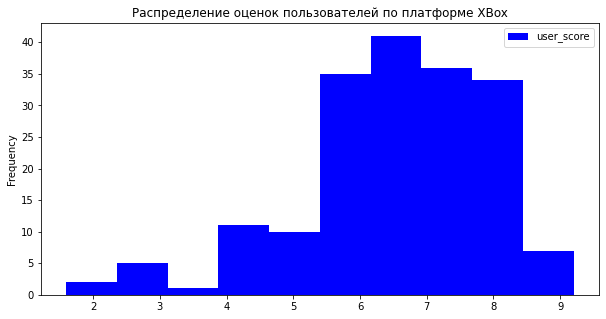

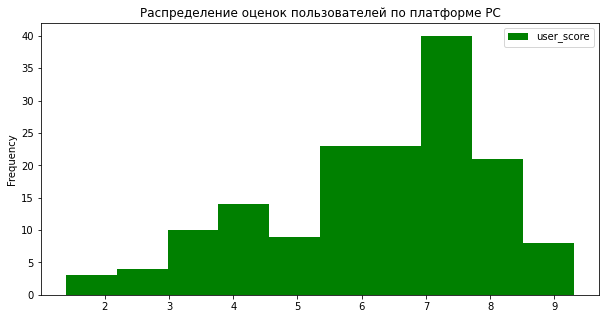

In [249]:
#Histprgamms for user scores to ssee distribution
xbox_one.plot(y='user_score', kind='hist', title='Распределение оценок пользователей по платформе XBox',\
              figsize=(10, 5), color='blue')
pc.plot(y='user_score', kind='hist', title='Распределение оценок пользователей по платформе PC',\
              figsize=(10, 5), color='green')
plt.show()

Распределение со смещением влево, но Центральная Предельная Теорема (ЦПТ) позволяет проводить сравнение гипотез при таком распределении, т.к. тест производится при помощи выборок со случайными значениями, которые по факту нормально распределены относительно среднего всей генеральной совокупности.

Проведем проверку гипотезы.

In [240]:
#Set appha
alpha = .05
#Perform hypothesis testing using st.ttest_ind method; as variances are different, add equal_var=False
results = st.ttest_ind(xbox_one['user_score'],pc['user_score'],equal_var=False, nan_policy='omit')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1475962317516997
Не получилось отвергнуть нулевую гипотезу


Результат проверки гипотезы можно трактовать так: средние пользовательские оценки для Xbox One и PC весьма схожи, поэтому отвергнуть нулевую гипотезу мы не можем. Посмотрим дополнительно на средние оценки.

In [241]:
#Calculate mean value for XBox one user score
xbox_one['user_score'].mean()

6.5214286

In [242]:
#Calculate mean value for PC user score
pc['user_score'].mean()

6.2696776

6.5 против 6.3, это и правда довольно близкие значения.

**Сформулируем нулевую и альтернативную гипотезы для второй задачи:**

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports разные.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Гипотезы сформулированы верно.
    
     
</div>

In [250]:
#Extract data about two genres from dataframe
action = platforms_actual.query('genre == "Action" and user_score != 0')
sports = platforms_actual.query('genre == "Sports" and user_score != 0')
#Show variances for both massives
print("Дисперсия выборки жанра экшн",np.var(action['user_score']))
print("Дисперсия выборки жанра спорт",np.var(sports['user_score']))

Дисперсия выборки жанра экшн 1.7648125
Дисперсия выборки жанра спорт 3.160734


Дисперсии снова сильно отличаются - разброс данных по оценке пользователей у жанра спорт выше, чем у жанра экшн.

Оценим распределение пользовательских оценок по интересующим нас жанрам.

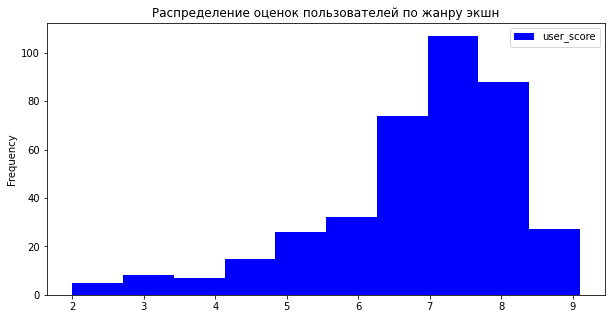

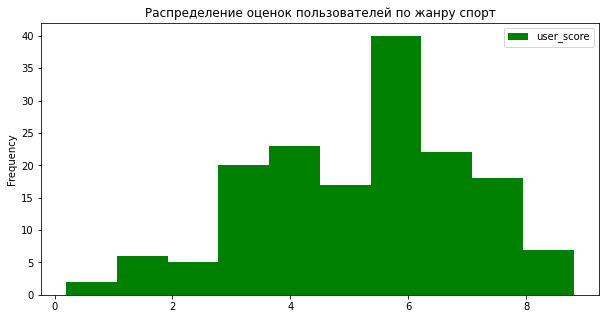

In [244]:
#Histprgamms for user scores to ssee distribution
action.plot(y='user_score', kind='hist', title='Распределение оценок пользователей по жанру экшн',\
              figsize=(10, 5), color='blue')
sports.plot(y='user_score', kind='hist', title='Распределение оценок пользователей по жанру спорт',\
              figsize=(10, 5), color='green')
plt.show()

И снова оценки распределены со смещением влево. Это говорит о том, что много низких оценок. Но для проверки гипотез это не преграда, ЦПТ позволяет проводить тестирование гипотез с любым распределением генеральной совокупности.

Проведем проверку гипотезы.

In [245]:
#Set appha
alpha = .05
#Perform hypothesis testing using st.ttest_ind method; as variances are different, add equal_var=False
results = st.ttest_ind(action['user_score'],sports['user_score'],equal_var=False, nan_policy='omit')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.446052200045016e-20
Отвергаем нулевую гипотезу


Теперь результат обратный - отвергаем нулевую гипотезу о том, что пользовательские оценки двух выбранных жанров равны. Но тем самым подтверждаем утверждение "Средние пользовательские рейтинги жанров Action и Sports разные". 

In [246]:
#Calculate mean value for action games user score
action['user_score'].mean()

6.8375316

In [247]:
#Calculate mean value for sport games user score
sports['user_score'].mean()

5.2381253

Различие средних оценок довольно сильное - поэтому вполне очевидно что гипотеза отвергнута.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Обрати внимание, что наши действия также повторяются с точки зрения расчетов статистических тестов, это говорит о том, что мы можем также создать здесь функцию 😊
    
</div>

**Общий вывод по пятому разделу:** 

Были проверены две гипотезы:

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;*

*Средние пользовательские рейтинги жанров Action и Sports разные.*

Результат по первой гипотезе: нельзя отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Средние по этим двум платформам равны 6.5 и 6.3, то есть отличаются незначительно, и с вероятностью 15% такое различие можно получить случайно. 

Результат по второй гипотезе: отвергаем гипотезу о том что средние пользовательские рейтинги жанров Action и Sports одинаковые. Средние по этим двум жанрам равны 6.8 и 5.2, соответственно, и вероятность получить такое отличие случайно крайне мала.

## Общий вывод

<div style="border:solid blue 3px; padding: 20px">
    
Получены на вход данные о компьютерных играх из открытых источников на конец 2016 года, проведена предобработка данных для повышения качества анализа:
    
    - текстовые данные проверены на явные и скрытые дубликаты, заменен рейтинг 'K-A' на 'E', т.к. это одинаковый рейтинг "игра подходит для любого возраста";
    
    - обработаны пропуски: удалены минимальные пропуски в наименованиях игр и жанрах; есть крупные пропуски в данных по оценкам критиков и пользователей, удалять или заменять которые нельзя; также присутствуют пропуски в рейтинге по возрасту - этих данных может не быть ввиду того что данный рейтинг появился в 1994 году, а первые игры в нашем анализе были созданы в 1980 году; кроме того, данный рейтинг отсутствует у игр произведенных не в США или Канаде;
    
По результату анализа данных о компьютерных играх, выявлены следующие закономерности, определяющие успешность платформы:
    
    - в среднем платформа на которой выпускаются игры имеет жизненный цикл около 10 лет, пика достигает через 2-3 года после выпуска, максимальные продажи длятся 2-5 лет, после чего начинается спад;
    
    - в целом рынок компьютерных игр стагнирует, почти все платформы сейчас находятся в состоянии спада;
    
Для интернет-магазина "Стримчик" выбраны потенциально популярные продукты, по которым предлагаем спланировать рекламные кампании на следующий год: 
    
    - с учетом стагнирующего рынка компьютерных игр в целом, выбраны платформы появившиеся в актуальный период (за 4 года до отчетного) и находящиеся в начале спада. По ним имеет смысл делать рекламные кампании: это PS4, 3DS и XOne. Фаворитами являются PS4 и XOne, т.к. объемы продаж у них выше и статистические показатели более стабильны;
    
    - при разработке рекламных кампаний, следует учесть влияние оценок критиков: лучше продвигать игры с оценками 70 и выше, т.к. они имеют опыт более успешных продаж. Пользователи доверяют отзывам критиков;
    
    - также нужно учесть особенности продаж по регионам: для Северной Америки и Европы имеет смысл вкладываться в игры в стиле экшн и стрелялки, а для Японии - в ролевые игры и экшн; 
    
    - наибольшее количество проданных копий на игру в жанре стрелялки, это также стоит иметь ввиду при продвижении игр;
    
    - рейтинг игр по возрасту стоит принять во внимание в разрезе регионов: рынку Америки и Европы больше интересны игры рейтинга М и Е, а в Японии ставку нужно сделать на подростков.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet     
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> 

Евгений, добрый день,

Спасибо большое за конструктивные комментарии, я почти все отработала - чтобы попрактиковать и не забыть хорошие инструменты и подходы.
Надеюсь, теперь проект выполнен не на хорошем уровне - а на отличном :)
    
Вопросов у меня нет, еще раз спасибо за такое классное ревью!
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>
    
Спасибо за твой фидбек, он ценен для меня 😊 Рад, что сразу применяешь новые знания, действительно так быстрее усвоятся новые знания.

Тогда предлагаю двигаться дальше.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
</div>